<a href="https://colab.research.google.com/github/lcjln/Tour_datalab/blob/main/%EC%88%98%EC%9A%94%EC%A7%80%EC%88%98_%EA%B5%AC%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#기본 패키지
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
#plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import tensorflow as tf
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

In [3]:
!sudo apt-get install -y fonts-nanum
!apt-get -qq install fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

Text(0.5, 1.0, '한글 보임')

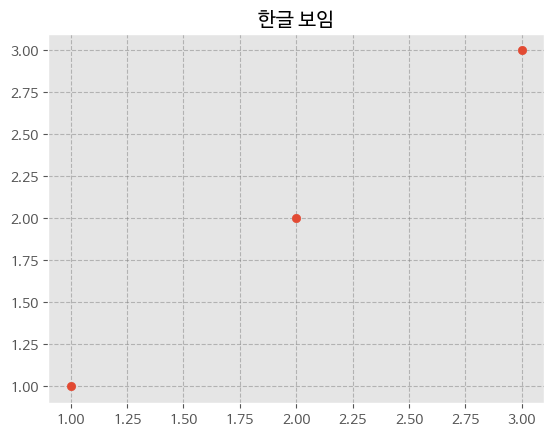

In [4]:
### 셀 실행 후 한글이 안보이면 런타임 다시 시작
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

import matplotlib.pyplot as plt

### 그래프 기본 설정
plt.style.use('ggplot')
# ['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale','Solarize_Light2', 'tableau-colorblind10', '_classic_test']
plt.grid(True, axis='both', color='grey', alpha=0.5, linestyle='--')   # axis='y'
plt.rc('font', family='NanumBarunGothic')

plt.scatter([1,2,3],[1,2,3])    # plt 한글 확인
plt.title('한글 보임')

In [5]:
df = pd.read_csv('/content/2024년 국민여행조사 국내여행 RAWDATA.csv')
df.head()

/tmp/ipython-input-2182472147.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,

,아이디,공통] A_여행 횟수-1. 국내 관광/휴양 여행,공통] A_여행 횟수-2. 국내 가족/친지/친구 방문 여행 - 관광/휴양 활동 포함,공통] A_여행 횟수-3. 국내 단순 가족/친지/친구 방문 - 관광/휴양 활동이 포함되지 않음,공통] A_여행 횟수-4. 국내 출장/업무 여행 - 관광/휴양 활동 포함,공통] A_여행 횟수-5. 국내 단순 출장/업무 경험 - 관광/휴양 활동이 포함되지 않음,공통] A-1_여행경험_국내 가족/친지/친구 방문 여행-관광/휴양 활동,공통] A-2_여행경험_국내 가족/친지/친구 방문 여행-관광/휴양 활동 포함,공통] A-3_여행경험_국내 단순 가족/친지/친구 방문-관광/휴양 활동 포함되지 않음,공통] A-4_여행경험_국내 출장/업무 여행-관광/휴양 활동 포함,...,국내] 여행방문지_기타당일여행1,국내] 여행방문지_기타당일여행2,국내] 여행방문지_기타당일여행3,국내] 여행방문지_기타당일여행4,국내] 여행방문지_기타당일여행5,국내] 여행방문지_기타당일여행6,국내] 여행방문지_기타당일여행7,국내] 여행방문지_기타당일여행8,국내] 여행방문지_기타당일여행9,국내] 여행방문지_기타당일여행10
0,ID,SA1_1,SA1_2,SA1_3,SA1_4,SA1_5,MON_EXP_1,MON_EXP_2,MON_EXP_3,MON_EXP_4,...,국내_여행방문지_기타당일1,국내_여행방문지_기타당일2,국내_여행방문지_기타당일3,국내_여행방문지_기타당일4,국내_여행방문지_기타당일5,국내_여행방문지_기타당일6,국내_여행방문지_기타당일7,국내_여행방문지_기타당일8,국내_여행방문지_기타당일9,국내_여행방문지_기타당일10
1,11010550271_275001,0,0,0,0,0,2.00,2.00,2.00,2.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11010550271_275003,1,0,0,0,0,1.00,2.00,2.00,2.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11010550271_275004,1,0,0,0,0,1.00,2.00,2.00,2.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11010550271_275007,0,0,0,0,0,2.00,2.00,2.00,2.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# 첫 행을 건너뛰고 두 번째 행을 컬럼으로
df = pd.read_csv("/content/2024년 국민여행조사 국내여행 RAWDATA.csv", header=1)

# 결과 확인
print(df.head())

/tmp/ipython-input-3740230682.py:2: DtypeWarning: Columns (183,355,527,699,1207) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/2024년 국민여행조사 국내여행 RAWDATA.csv", header=1)


                   ID  SA1_1  SA1_2  SA1_3  SA1_4  SA1_5  MON_EXP_1  \
0  11010550271_275001      0      0      0      0      0        2.0   
1  11010550271_275003      1      0      0      0      0        1.0   
2  11010550271_275004      1      0      0      0      0        1.0   
3  11010550271_275007      0      0      0      0      0        2.0   
4  11010550271_275008      0      0      0      0      0        2.0   

   MON_EXP_2  MON_EXP_3  MON_EXP_4  ...  국내_여행방문지_기타당일1 국내_여행방문지_기타당일2  \
0        2.0        2.0        2.0  ...             NaN            NaN   
1        2.0        2.0        2.0  ...             NaN            NaN   
2        2.0        2.0        2.0  ...             NaN            NaN   
3        2.0        2.0        2.0  ...             NaN            NaN   
4        2.0        2.0        2.0  ...             NaN            NaN   

   국내_여행방문지_기타당일3  국내_여행방문지_기타당일4  국내_여행방문지_기타당일5  국내_여행방문지_기타당일6  \
0             NaN             NaN             NaN          

# 데이터 전처리

1) 관광목적 여행만 추출 -> SA1_1, SA1_2, SA1_4, MON_EXP_1, MON_EXP_2, MON_EXP_4에서 1이라고 응답한사람

2) 총방문자수 구하기 -> 칼럼명'SPOT'이 포함되어 있는 칼럼의 지역코드 수집

3) 60세 이상 총방문자수 구하기 -> BAGE == 6 | BAGE == 7로 필터링

# 1) 관광목적 여행만 추출

In [48]:
# 1) 관광목적 여행만 추출
df = df[(df['SA1_1']==1) | (df['SA1_2']==2) |  (df['SA1_4']==1) | (df['MON_EXP_1']==1) | (df['MON_EXP_2']==1) | (df['MON_EXP_4']==1)]
df.head()

,ID,SA1_1,SA1_2,SA1_3,SA1_4,SA1_5,MON_EXP_1,MON_EXP_2,MON_EXP_3,MON_EXP_4,...,국내_여행방문지_기타당일1,국내_여행방문지_기타당일2,국내_여행방문지_기타당일3,국내_여행방문지_기타당일4,국내_여행방문지_기타당일5,국내_여행방문지_기타당일6,국내_여행방문지_기타당일7,국내_여행방문지_기타당일8,국내_여행방문지_기타당일9,국내_여행방문지_기타당일10
1,11010550271_275003,1,0,0,0,0,1.0,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11010550271_275004,1,0,0,0,0,1.0,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,11010550271_275011,1,0,0,0,0,1.0,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,11010680011_420482,1,0,0,0,0,1.0,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,11010680011_420489,1,0,0,0,0,1.0,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
df.columns

Index(['ID', 'SA1_1', 'SA1_2', 'SA1_3', 'SA1_4', 'SA1_5', 'MON_EXP_1',
       'MON_EXP_2', 'MON_EXP_3', 'MON_EXP_4',
       ...
       '국내_여행방문지_기타당일1', '국내_여행방문지_기타당일2', '국내_여행방문지_기타당일3', '국내_여행방문지_기타당일4',
       '국내_여행방문지_기타당일5', '국내_여행방문지_기타당일6', '국내_여행방문지_기타당일7', '국내_여행방문지_기타당일8',
       '국내_여행방문지_기타당일9', '국내_여행방문지_기타당일10'],
      dtype='object', length=2227)

In [50]:
import re
import numpy as np
import pandas as pd

# df 원본이 이미 메모리에 있다고 가정
cols = df.columns.tolist()

# 방문지, 체류시간, 1인당 지출액, 여행유형 컬럼 찾기
spot_cols = [c for c in cols if re.fullmatch(r"D_TRA[12]_\d+_SPOT", c)]
stay_cols = [c for c in cols if re.fullmatch(r"D_TRA[12]_S_Day", c)]
one_cols  = [c for c in cols if re.fullmatch(r"D_TRA[12]_ONE_COST", c)]
case_cols = [c for c in cols if re.fullmatch(r"D_TRA[12]_CASE", c)]

# 연령 컬럼 확인
age_col = "BAGE" if "BAGE" in cols else None

# base_cols에 연령, 체류시간, 지출액, 여행유형 포함
base_cols = [c for c in ["ID", age_col] if c in cols] + stay_cols + one_cols + case_cols

# wide → long 변환
long_df = df.melt(
    id_vars=base_cols,
    value_vars=spot_cols,
    var_name="visit_col",
    value_name="SIG_CODE"
).dropna(subset=["SIG_CODE"])

# trip 번호 추출
long_df["trip"] = long_df["visit_col"].str.extract(r"D_TRA([12])_", expand=False)

# 확인
long_df

,ID,BAGE,D_TRA1_S_Day,D_TRA2_S_Day,D_TRA1_ONE_COST,D_TRA2_ONE_COST,D_TRA1_CASE,D_TRA2_CASE,visit_col,SIG_CODE,trip
0,11010550271_275003,4.0,1.0,NaN,340002.0,NaN,1.0,NaN,D_TRA1_1_SPOT,32030.0,1
1,11010550271_275004,3.0,1.0,NaN,303333.0,NaN,1.0,NaN,D_TRA1_1_SPOT,32030.0,1
2,11010550271_275011,2.0,1.0,NaN,313334.0,NaN,1.0,NaN,D_TRA1_1_SPOT,38090.0,1
3,11010680011_420482,4.0,0.0,NaN,16500.0,NaN,1.0,NaN,D_TRA1_1_SPOT,31270.0,1
4,11010680011_420489,6.0,0.0,NaN,35000.0,NaN,1.0,NaN,D_TRA1_1_SPOT,34060.0,1
...,...,...,...,...,...,...,...,...,...,...,...
611548,3304354285A_461559,3.0,0.0,2.0,150000.0,522500.0,3.0,1.0,D_TRA2_9_SPOT,39010.0,2
613033,34080110231_437853,6.0,0.0,2.0,50000.0,483333.0,3.0,1.0,D_TRA2_9_SPOT,39010.0,2
621487,1113071092A_643162,5.0,0.0,2.0,80000.0,720000.0,3.0,1.0,D_TRA2_10_SPOT,39010.0,2
645350,1113071092A_643162,5.0,0.0,2.0,80000.0,720000.0,3.0,1.0,D_TRA2_11_SPOT,39010.0,2


# 2) 총방문자수 구하기

In [52]:
# 2) 총방문자수 구하기
# 방문지 코드 컬럼만 추출 (예시: _SPOT 으로 끝나는 컬럼)
spot_cols = [col for col in df.columns if col.endswith("_SPOT")]

# wide → long 변환
long_df = df.melt(value_vars=spot_cols, value_name="SIG_CODE").dropna(subset=["SIG_CODE"])

# 시도 코드(앞 2자리) 추출
long_df["SIDO_CODE"] = long_df["SIG_CODE"].astype(str).str[:2]

# 시도별 총방문자 수
total_visitors_sido = long_df.groupby("SIDO_CODE").size().reset_index(name="총방문자")

# 출력
print(total_visitors_sido.sort_values("총방문자", ascending=False))

   SIDO_CODE  총방문자
13        36  5428
9         32  4777
14        37  4384
16        39  4337
15        38  4326
11        34  4123
8         31  4122
12        35  2947
1         21  2410
10        33  2039
0         11  1354
3         23   845
5         25   640
2         22   623
6         26   576
4         24   303
7         29   241


In [53]:
# 시도 코드 → 시도명 매핑
sido_map = {
    "11": "서울특별시",
    "21": "부산광역시",
    "22": "대구광역시",
    "23": "인천광역시",
    "24": "광주광역시",
    "25": "대전광역시",
    "26": "울산광역시",
    "29": "세종특별자치시",
    "31": "경기도",
    "32": "강원특별자치도",
    "33": "충청북도",
    "34": "충청남도",
    "35": "전라북도",
    "36": "전라남도",
    "37": "경상북도",
    "38": "경상남도",
    "39": "제주특별자치도"
}

# SIDO_CODE를 문자열로 맞추기
total_visitors_sido["SIDO_CODE"] = total_visitors_sido["SIDO_CODE"].astype(str)

# 시도명 컬럼 추가
total_visitors_sido["시도명"] = total_visitors_sido["SIDO_CODE"].map(sido_map)

# 결과 확인
print(total_visitors_sido.sort_values("총방문자", ascending=False))

   SIDO_CODE  총방문자      시도명
13        36  5428     전라남도
9         32  4777  강원특별자치도
14        37  4384     경상북도
16        39  4337  제주특별자치도
15        38  4326     경상남도
11        34  4123     충청남도
8         31  4122      경기도
12        35  2947     전라북도
1         21  2410    부산광역시
10        33  2039     충청북도
0         11  1354    서울특별시
3         23   845    인천광역시
5         25   640    대전광역시
2         22   623    대구광역시
6         26   576    울산광역시
4         24   303    광주광역시
7         29   241  세종특별자치시


# 3) 60세 이상 총방문자수 구하기

In [59]:
# 1) 60세 이상 필터링
df_age60 = df[df["BAGE"].isin([6, 7])]

# 2) spot 컬럼만 추출
spot_cols = [col for col in df_age60.columns if col.endswith("_SPOT")]

# 3) wide → long 변환 (SIG_CODE 생성)
long_df60 = df_age60.melt(value_vars=spot_cols, value_name="SIG_CODE").dropna(subset=["SIG_CODE"])

# 4) 시도 코드 생성
long_df60["SIDO_CODE"] = long_df60["SIG_CODE"].astype(str).str[:2]

# 5) 시도별 60+ 총방문자 수
visitors_60plus_sido = (
    long_df60.groupby("SIDO_CODE").size().reset_index(name="총방문자_60plus")
)

# 6) 시도명 매핑
sido_map = {
    "11":"서울특별시","21":"부산광역시","22":"대구광역시","23":"인천광역시","24":"광주광역시",
    "25":"대전광역시","26":"울산광역시","29":"세종특별자치시","31":"경기도","32":"강원특별자치도",
    "33":"충청북도","34":"충청남도","35":"전라북도","36":"전라남도","37":"경상북도","38":"경상남도","39":"제주특별자치도"
}
visitors_60plus_sido["시도명"] = visitors_60plus_sido["SIDO_CODE"].astype(str).map(sido_map)

# 7) 내림차순 정렬
visitors_60plus_sido = visitors_60plus_sido.sort_values("총방문자_60plus", ascending=False).reset_index(drop=True)

print(visitors_60plus_sido.sort_values("총방문자_60plus", ascending=False))

   SIDO_CODE  총방문자_60plus      시도명
0         36         1336     전라남도
1         39         1034  제주특별자치도
2         34          983     충청남도
3         38          963     경상남도
4         37          952     경상북도
5         32          878  강원특별자치도
6         31          825      경기도
7         35          767     전라북도
8         33          558     충청북도
9         21          388    부산광역시
10        11          251    서울특별시
11        23          198    인천광역시
12        22          143    대구광역시
13        25          121    대전광역시
14        26          119    울산광역시
15        24           75    광주광역시
16        29           37  세종특별자치시


# 4) 평균체류일 구하기

In [64]:
# 0) 숙박일수 컬럼 지정
stay_cols = [f"D_TRA{i}_S_Day" for i in range(1, 6)]

# 1) long_df 만들기 (방문지 코드 포함)
spot_cols = [col for col in df.columns if col.endswith("_SPOT")]
long_df = df.melt(
    id_vars=stay_cols,  # 숙박일수 정보 유지
    value_vars=spot_cols,
    value_name="SIG_CODE"
).dropna(subset=["SIG_CODE"])

# 2) 시도 코드 생성
long_df["SIDO_CODE"] = long_df["SIG_CODE"].astype(str).str[:2]

# 3) 총 숙박박수 + 총 체류일수
long_df["총숙박박수"] = long_df[stay_cols].fillna(0).sum(axis=1)
long_df["총체류일수"] = long_df["총숙박박수"] + 1

# 4) 시도별 평균 체류일수
avg_stay_sido = (
    long_df.groupby("SIDO_CODE")["총체류일수"]
           .mean()
           .reset_index(name="평균체류일수")
)

# 5) 시도명 매핑
sido_map = {
    "11":"서울특별시","21":"부산광역시","22":"대구광역시","23":"인천광역시","24":"광주광역시",
    "25":"대전광역시","26":"울산광역시","29":"세종특별자치시","31":"경기도","32":"강원특별자치도",
    "33":"충청북도","34":"충청남도","35":"전라북도","36":"전라남도","37":"경상북도","38":"경상남도","39":"제주특별자치도"
}
avg_stay_sido["시도명"] = avg_stay_sido["SIDO_CODE"].astype(str).map(sido_map)

# 6) 정렬
avg_stay_sido = avg_stay_sido.sort_values("평균체류일수", ascending=False).reset_index(drop=True)

print(avg_stay_sido)

   SIDO_CODE    평균체류일수      시도명
0         39  3.026747  제주특별자치도
1         32  2.104668  강원특별자치도
2         21  2.082573    부산광역시
3         24  1.874587    광주광역시
4         37  1.812044     경상북도
5         11  1.778434    서울특별시
6         38  1.773694     경상남도
7         22  1.725522    대구광역시
8         36  1.709838     전라남도
9         33  1.696910     충청북도
10        35  1.663726     전라북도
11        25  1.657812    대전광역시
12        34  1.653165     충청남도
13        26  1.637153    울산광역시
14        23  1.543195    인천광역시
15        29  1.410788  세종특별자치시
16        31  1.385007      경기도


# 4) 1인당 지출액 구하기

In [65]:
# 0) 지출액 컬럼 지정 (여행 1~5차)
exp_cols = [f"F_EXP_{i}" for i in range(1, 6) if f"F_EXP_{i}" in df.columns]

# 1) long_df 생성 (총방문자 계산할 때와 동일하게)
spot_cols = [col for col in df.columns if col.endswith("_SPOT")]
long_df = df.melt(
    id_vars=exp_cols,  # 지출액 정보 유지
    value_vars=spot_cols,
    value_name="SIG_CODE"
).dropna(subset=["SIG_CODE"])

# 2) 시도 코드 생성
long_df["SIDO_CODE"] = long_df["SIG_CODE"].astype(str).str[:2]

# 3) 총 지출액 & 1인당 지출액
long_df["총지출액"] = long_df[exp_cols].fillna(0).sum(axis=1)

# 4) 시도별 평균 1인당 지출액
avg_exp_sido = (
    long_df.groupby("SIDO_CODE")["총지출액"]
           .mean()
           .reset_index(name="평균1인당지출액")
)

# 5) 시도명 매핑
sido_map = {
    "11":"서울특별시","21":"부산광역시","22":"대구광역시","23":"인천광역시","24":"광주광역시",
    "25":"대전광역시","26":"울산광역시","29":"세종특별자치시","31":"경기도","32":"강원특별자치도",
    "33":"충청북도","34":"충청남도","35":"전라북도","36":"전라남도","37":"경상북도","38":"경상남도","39":"제주특별자치도"
}
avg_exp_sido["시도명"] = avg_exp_sido["SIDO_CODE"].astype(str).map(sido_map)

# 6) 내림차순 정렬
avg_exp_sido = avg_exp_sido.sort_values("평균1인당지출액", ascending=False).reset_index(drop=True)

print(avg_exp_sido)

   SIDO_CODE  평균1인당지출액      시도명
0         11       0.0    서울특별시
1         21       0.0    부산광역시
2         22       0.0    대구광역시
3         23       0.0    인천광역시
4         24       0.0    광주광역시
5         25       0.0    대전광역시
6         26       0.0    울산광역시
7         29       0.0  세종특별자치시
8         31       0.0      경기도
9         32       0.0  강원특별자치도
10        33       0.0     충청북도
11        34       0.0     충청남도
12        35       0.0     전라북도
13        36       0.0     전라남도
14        37       0.0     경상북도
15        38       0.0     경상남도
16        39       0.0  제주특별자치도


In [67]:
# 1차~5차 1인당 소비액 컬럼
cost_cols = [f"D_TRA{i}_ONE_COST" for i in range(1, 6)]

# SIG_CODE 생성 (총방문자 구할 때와 동일한 방식)
spot_cols = [col for col in df.columns if col.endswith("_SPOT")]
long_df = df.melt(value_vars=spot_cols, value_name="SIG_CODE").dropna(subset=["SIG_CODE"])

# 지출액 붙이기 - 원본 df에서 같은 인덱스 기준 병합
long_df = long_df.join(df[cost_cols])

# 시도 코드
long_df["SIDO_CODE"] = long_df["SIG_CODE"].astype(str).str[:2]

# 시도별 평균 지출액
avg_cost_sido = long_df.groupby("SIDO_CODE")[cost_cols].mean().reset_index()

# 시도명 매핑
sido_map = {
    "11":"서울특별시","21":"부산광역시","22":"대구광역시","23":"인천광역시","24":"광주광역시",
    "25":"대전광역시","26":"울산광역시","29":"세종특별자치시","31":"경기도","32":"강원특별자치도",
    "33":"충청북도","34":"충청남도","35":"전라북도","36":"전라남도","37":"경상북도","38":"경상남도","39":"제주특별자치도"
}
avg_cost_sido["시도명"] = avg_cost_sido["SIDO_CODE"].map(sido_map)

print(avg_cost_sido)

   SIDO_CODE  D_TRA1_ONE_COST  D_TRA2_ONE_COST  D_TRA3_ONE_COST  \
0         11    126673.941606    107996.272727     87500.000000   
1         21    126781.385781    105966.657895     63889.000000   
2         22    126794.110169     76314.777778    200000.000000   
3         23    135220.795796    150616.650000     81666.666667   
4         24    116886.395973     72278.166667              NaN   
5         25    142019.099631     80300.500000              NaN   
6         26    133534.119816     59942.857143    100000.000000   
7         29    125072.196078     62385.571429              NaN   
8         31    143813.810685    110904.929293    124441.176471   
9         32    140799.525761     82827.923077     81250.000000   
10        33    130212.125628     98973.333333              NaN   
11        34    123109.138330    119847.975000     86500.000000   
12        35    123936.110044    123615.979167     50000.000000   
13        36    134491.562591    105812.107143     70000.00000

In [68]:
# NaN을 0으로 처리
avg_cost_sido[cost_cols] = avg_cost_sido[cost_cols].fillna(0)

# 1차~5차 합계
avg_cost_sido["총_1인당소비액"] = avg_cost_sido[cost_cols].sum(axis=1)

# 소비액 내림차순 정렬
avg_cost_sido = avg_cost_sido.sort_values("총_1인당소비액", ascending=False).reset_index(drop=True)

print(avg_cost_sido[["SIDO_CODE", "시도명", "총_1인당소비액"]])

   SIDO_CODE      시도명       총_1인당소비액
0         38     경상남도  595425.399463
1         23    인천광역시  517504.112462
2         34     충청남도  499457.113330
3         36     전라남도  407303.669734
4         22    대구광역시  403108.887947
5         21    부산광역시  396637.043676
6         31      경기도  379159.916449
7         11    서울특별시  322170.214333
8         32  강원특별자치도  304877.448838
9         35     전라북도  297552.089210
10        37     경상북도  293606.783231
11        26    울산광역시  293476.976959
12        39  제주특별자치도  267231.866844
13        33     충청북도  229185.458961
14        25    대전광역시  222319.599631
15        24    광주광역시  189164.562640
16        29  세종특별자치시  187457.767507


# 구한 수치들을 Z-SCORE를 이용해서 정규화한 후 수요지수를 구한다

In [70]:
import pandas as pd

# 0) 안전장치: 키 컬럼을 문자열로 통일
for _df in [total_visitors_sido, visitors_60plus_sido, avg_stay_sido, avg_exp_sido]:
    _df["SIDO_CODE"] = _df["SIDO_CODE"].astype(str)

# 1) 병합 전, 중복될 수 있는 '시도명'은 모두 제거
def drop_sidoname(d):
    return d.drop(columns=["시도명"], errors="ignore")

tv  = drop_sidoname(total_visitors_sido)      # 총방문자
v60 = drop_sidoname(visitors_60plus_sido)     # 60+ 총방문자
stay= drop_sidoname(avg_stay_sido)            # 평균체류일수
exp = drop_sidoname(avg_exp_sido)             # 평균1인당지출액

# 2) 병합
df_merge = (
    tv
    .merge(v60,  on="SIDO_CODE", how="left")
    .merge(stay, on="SIDO_CODE", how="left")
    .merge(exp,  on="SIDO_CODE", how="left")
)

# 3) 시도명은 최종에서 한 번만 매핑
sido_map = {
    "11":"서울특별시","21":"부산광역시","22":"대구광역시","23":"인천광역시","24":"광주광역시",
    "25":"대전광역시","26":"울산광역시","29":"세종특별자치시","31":"경기도","32":"강원특별자치도",
    "33":"충청북도","34":"충청남도","35":"전라북도","36":"전라남도","37":"경상북도","38":"경상남도","39":"제주특별자치도"
}
df_merge["시도명"] = df_merge["SIDO_CODE"].map(sido_map)

# 4) 원하는 컬럼만, 순서 정리
want_cols = ["SIDO_CODE", "총방문자", "총방문자_60plus", "평균체류일수", "평균1인당지출액", "시도명"]
df_final = df_merge[want_cols]

print(df_final.sort_values("총방문자", ascending=False))

   SIDO_CODE  총방문자  총방문자_60plus    평균체류일수  평균1인당지출액      시도명
13        36  5428         1336  1.709838       0.0     전라남도
9         32  4777          878  2.104668       0.0  강원특별자치도
14        37  4384          952  1.812044       0.0     경상북도
16        39  4337         1034  3.026747       0.0  제주특별자치도
15        38  4326          963  1.773694       0.0     경상남도
11        34  4123          983  1.653165       0.0     충청남도
8         31  4122          825  1.385007       0.0      경기도
12        35  2947          767  1.663726       0.0     전라북도
1         21  2410          388  2.082573       0.0    부산광역시
10        33  2039          558  1.696910       0.0     충청북도
0         11  1354          251  1.778434       0.0    서울특별시
3         23   845          198  1.543195       0.0    인천광역시
5         25   640          121  1.657812       0.0    대전광역시
2         22   623          143  1.725522       0.0    대구광역시
6         26   576          119  1.637153       0.0    울산광역시
4         24   303      

In [71]:
# 기존 병합 로직
df_final = (
    total_visitors_sido
    .merge(visitors_60plus_sido[["SIDO_CODE", "총방문자_60plus"]], on="SIDO_CODE", how="left")
    .merge(avg_stay_sido[["SIDO_CODE", "평균체류일수"]], on="SIDO_CODE", how="left")
    .merge(avg_cost_sido[["SIDO_CODE", "총_1인당소비액"]], on="SIDO_CODE", how="left")  # ← 변경
)

# 시도명 매핑
df_final["시도명"] = df_final["SIDO_CODE"].astype(str).map(sido_map)

# 보기 좋게 정렬
df_final = df_final.sort_values("총방문자", ascending=False).reset_index(drop=True)

print(df_final)

   SIDO_CODE  총방문자      시도명  총방문자_60plus    평균체류일수       총_1인당소비액
0         36  5428     전라남도         1336  1.709838  407303.669734
1         32  4777  강원특별자치도          878  2.104668  304877.448838
2         37  4384     경상북도          952  1.812044  293606.783231
3         39  4337  제주특별자치도         1034  3.026747  267231.866844
4         38  4326     경상남도          963  1.773694  595425.399463
5         34  4123     충청남도          983  1.653165  499457.113330
6         31  4122      경기도          825  1.385007  379159.916449
7         35  2947     전라북도          767  1.663726  297552.089210
8         21  2410    부산광역시          388  2.082573  396637.043676
9         33  2039     충청북도          558  1.696910  229185.458961
10        11  1354    서울특별시          251  1.778434  322170.214333
11        23   845    인천광역시          198  1.543195  517504.112462
12        25   640    대전광역시          121  1.657812  222319.599631
13        22   623    대구광역시          143  1.725522  403108.887947
14        

In [75]:
from scipy.stats import zscore

# 복사본 생성
df_score = df_final.copy()

# z-score 계산
df_score["z_총방문자"] = zscore(df_score["총방문자"])
df_score["z_총방문자_60plus"] = zscore(df_score["총방문자_60plus"])
df_score["z_평균체류일수"] = zscore(df_score["평균체류일수"])
df_score["z_총_1인당소비액"] = zscore(df_score["총_1인당소비액"])

# 수요지수 계산
df_score["수요지수"] = (
    df_score["z_총방문자"] * 0.4 +
    df_score["z_총방문자_60plus"] * 0.3 +
    df_score["z_평균체류일수"] * 0.2 +
    df_score["z_총_1인당소비액"] * 0.1
)

# 수요지수 내림차순 정렬
df_score = df_score.sort_values("수요지수", ascending=False).reset_index(drop=True)

# 필요한 컬럼만 출력
print(df_score[["SIDO_CODE", "시도명", "총방문자", "총방문자_60plus", "평균체류일수", "총_1인당소비액", "수요지수"]])

   SIDO_CODE      시도명  총방문자  총방문자_60plus    평균체류일수       총_1인당소비액      수요지수
0         39  제주특별자치도  4337         1034  3.026747  267231.866844  1.361467
1         36     전라남도  5428         1336  1.709838  407303.669734  1.214791
2         38     경상남도  4326          963  1.773694  595425.399463  0.896225
3         32  강원특별자치도  4777          878  2.104668  304877.448838  0.864522
4         34     충청남도  4123          983  1.653165  499457.113330  0.713919
5         37     경상북도  4384          952  1.812044  293606.783231  0.657546
6         31      경기도  4122          825  1.385007  379159.916449  0.342938
7         35     전라북도  2947          767  1.663726  297552.089210  0.121407
8         21    부산광역시  2410          388  2.082573  396637.043676  0.044751
9         33     충청북도  2039          558  1.696910  229185.458961 -0.276138
10        11    서울특별시  1354          251  1.778434  322170.214333 -0.526800
11        23    인천광역시   845          198  1.543195  517504.112462 -0.639183
12        22

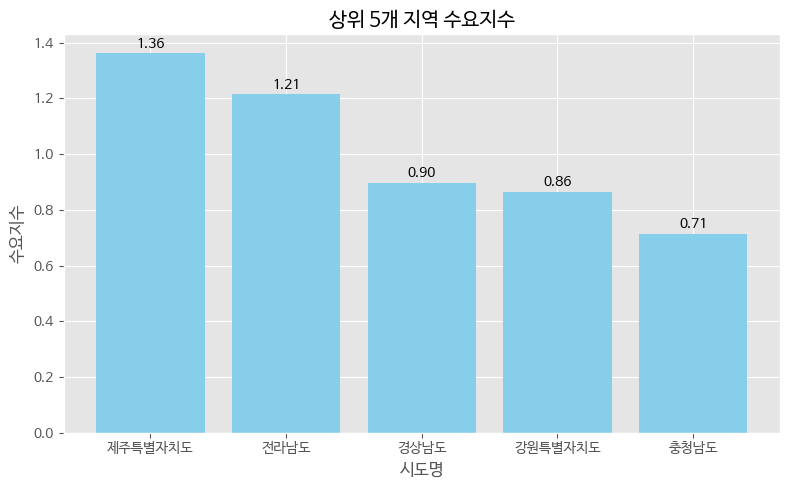

In [76]:
# 상위 5개 지역만 추출
top5 = df_score.nlargest(5, "수요지수")

# 그래프 크기 설정
plt.figure(figsize=(8, 5))

# 막대 그래프
plt.bar(top5["시도명"], top5["수요지수"], color='skyblue')

# 라벨 및 제목
plt.ylabel("수요지수")
plt.xlabel("시도명")
plt.title("상위 5개 지역 수요지수")

# 수치 표시
for i, val in enumerate(top5["수요지수"]):
    plt.text(i, val + 0.02, f"{val:.2f}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()

# 접근 지수 구하기



60세 이상의 선호하는 지역간 교통수단 측정하기 ->  1~5차 관광하는 동안 지역간 선호하는 교통수단

In [9]:
# 1) 60세 이상 필터링
df_age60 = df[df["BAGE"].isin([6, 7])].copy()

# 2) 교통수단 컬럼 리스트 생성 (1~5차, 각 3개 항목)
transport_cols = [f"D_TRA{i}_B7A_{j}" for i in range(1, 6) for j in range(1, 4) if f"D_TRA{i}_B7A_{j}" in df_age60.columns]

# 3) 데이터 추출
df_transport = df_age60[transport_cols]

# 4) 하나의 시리즈로 통합 후 빈도 계산
transport_counts = df_transport.melt(value_name="교통수단")["교통수단"].value_counts().reset_index()
transport_counts.columns = ["교통수단코드", "응답수"]

# 교통수단 코드 → 이름 매핑
transport_map = {
    1: "자가용",
    2: "철도",
    3: "항공기",
    4: "선박/해상 교통",
    5: "지하철",
    6: "[정기] 고속/시외/시내버스",
    7: "[부정기] 전세/관광버스",
    8: "차량대여/렌트",
    9: "자전거",
    10: "택시",
    11: "도보",
    12: "기타"
}

# 매핑 적용
transport_counts["교통수단명"] = transport_counts["교통수단코드"].map(transport_map)

print(transport_counts)

    교통수단코드   응답수            교통수단명
0      1.0  5609              자가용
1     11.0   389               도보
2      6.0   325  [정기] 고속/시외/시내버스
3      7.0   306    [부정기] 전세/관광버스
4      3.0   230              항공기
5      5.0   154              지하철
6      2.0   124               철도
7      4.0    68         선박/해상 교통
8     10.0    65               택시
9      8.0    40          차량대여/렌트
10     9.0    13              자전거
11    12.0     5               기타
